

# 911 Calls Data Analysis Capstone Project



For this data analysis project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Analytics skills!

### Section 1: Data and Setup

____
**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [2]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

**Read in the csv file as a dataframe called df**

In [4]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive\911.csv")

**Check the info() of the df**

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Check the head of df**

In [6]:
df.head ()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Section 2: Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [9]:
top_zipcodes = df['zip'].value_counts().head(5)
print (top_zipcodes)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64


**What are the top 5 townships (twp) for 911 calls?**

In [10]:
top_townships = df['twp'].value_counts().head(5)
print(top_townships)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64


**Take a look at the 'title' column, how many unique title codes are there?**

In [11]:
unique_title_codes = df['title'].nunique()
print("Number of unique title codes:", unique_title_codes)

Number of unique title codes: 148


### Section 3: Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.**

In [12]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
print(df['Reason'])

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object


**What is the most common Reason for a 911 call based off of this new column?**

In [13]:
most_common_reason = df['Reason'].value_counts().head(3)
print(most_common_reason)

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64


**Now use seaborn to create a countplot of 911 calls by Reason.**

C:\Users\HP\AppData\Local\Temp\ipykernel_15588\2994129200.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Reason', palette='viridis')


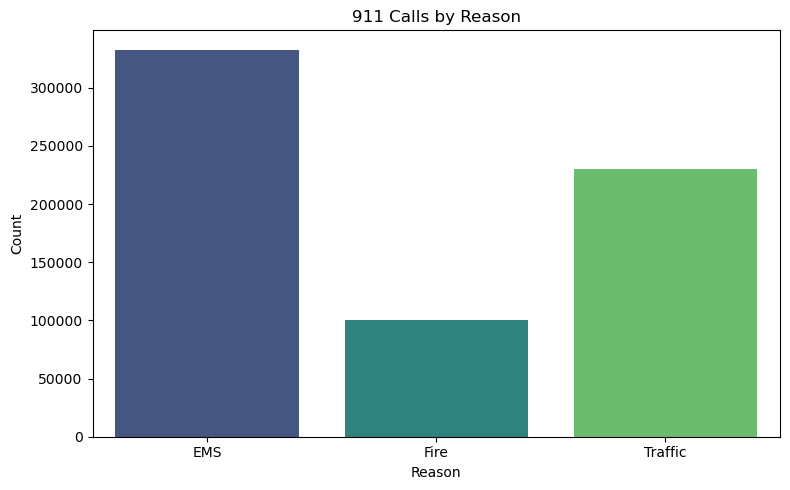

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a countplot of 911 calls by Reason
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Reason', palette='viridis')
plt.title("911 Calls by Reason")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [16]:
type(df['timeStamp'].iloc[0])

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [17]:
pd.to_datetime(df['timeStamp'])

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], errors='coerce')

In [21]:
print("Number of NaT (failed datetime conversions):", df['timeStamp'].isna().sum())

Number of NaT (failed datetime conversions): 0


In [22]:
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['DayOfWeek'] = df['timeStamp'].dt.dayofweek

print(df[['Hour', 'Month', 'DayOfWeek']].head())

   Hour  Month  DayOfWeek
0    17     12          3
1    17     12          3
2    14     12          3
3    16     12          3
4    16     12          3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [34]:
# Convert timeStamp to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Create required time-based features
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['Day of Week'] = df['timeStamp'].dt.dayofweek  # 0 = Monday, 6 = Sunday




**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<Figure size 500x600 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

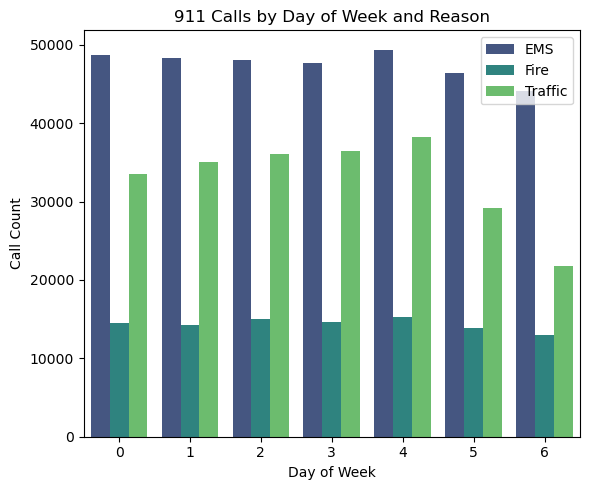

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Day of Week', hue='Reason', palette='viridis')
plt.title('911 Calls by Day of Week and Reason')
plt.xlabel('Day of Week')
plt.ylabel('Call Count')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


**Now do the same for Month:**

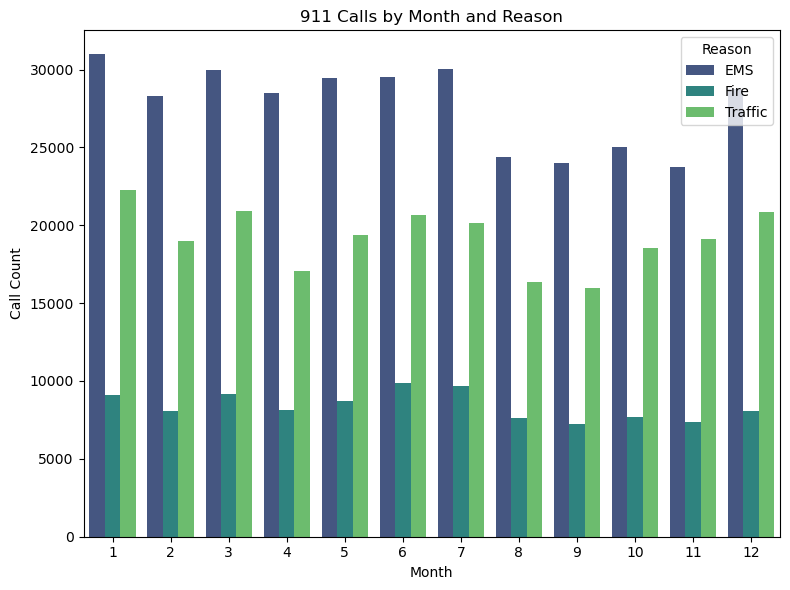

In [36]:
# Create countplot of Month with hue based on Reason
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Month', hue='Reason', palette='viridis')
plt.title('911 Calls by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Call Count')
plt.legend(title='Reason')
plt.tight_layout()
plt.show()

**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [37]:
byMonth = df.groupby('Month').count()
print(byMonth.head())

         lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      62336  62336  62336  55294  62336      62336  62312  62336  62336   
2      55427  55427  55427  48922  55427      55427  55405  55427  55427   
3      60027  60027  60027  53252  60027      60027  60001  60027  60027   
4      53671  53671  53671  47349  53671      53671  53655  53671  53671   
5      57509  57509  57509  50354  57509      57509  57474  57509  57509   

       Reason   Hour  DayOfWeek  Day of Week  
Month                                         
1       62336  62336          0        62336  
2       55427  55427          0        55427  
3       60027  60027          0        60027  
4       53671  53671          0        53671  
5       57509  57509          0        57509  


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

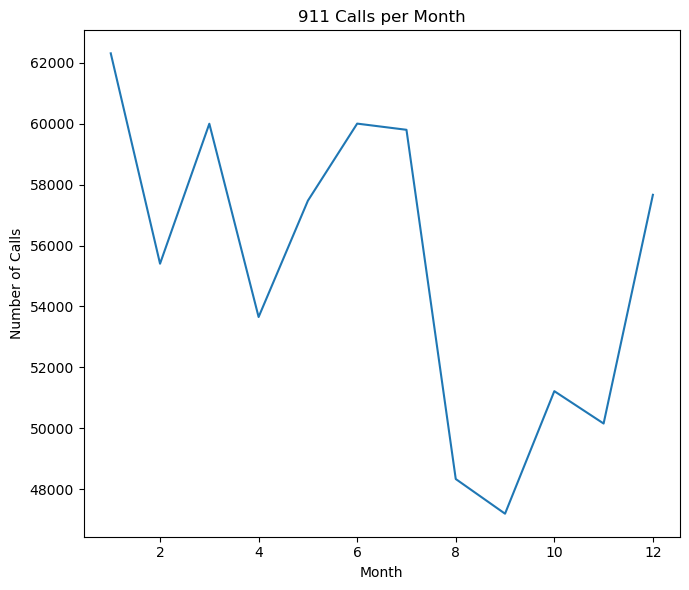

In [38]:
plt.figure(figsize=(7, 6))
byMonth['twp'].plot()
plt.title('911 Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

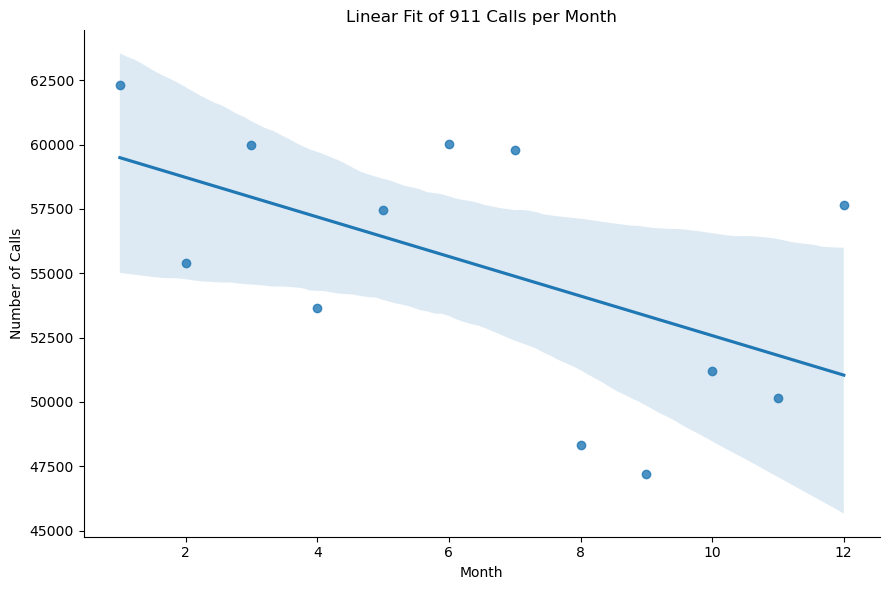

In [39]:
byMonth_reset = byMonth.reset_index()

sns.lmplot(data=byMonth_reset, x='Month', y='twp', height=6, aspect=1.5)
plt.title('Linear Fit of 911 Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [40]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

print(df[['Date']])

              Date
0       2015-12-10
1       2015-12-10
2       2015-12-10
3       2015-12-10
4       2015-12-10
...            ...
663517  2020-07-29
663518  2020-07-29
663519  2020-07-29
663520  2020-07-29
663521  2020-07-29

[663522 rows x 1 columns]


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

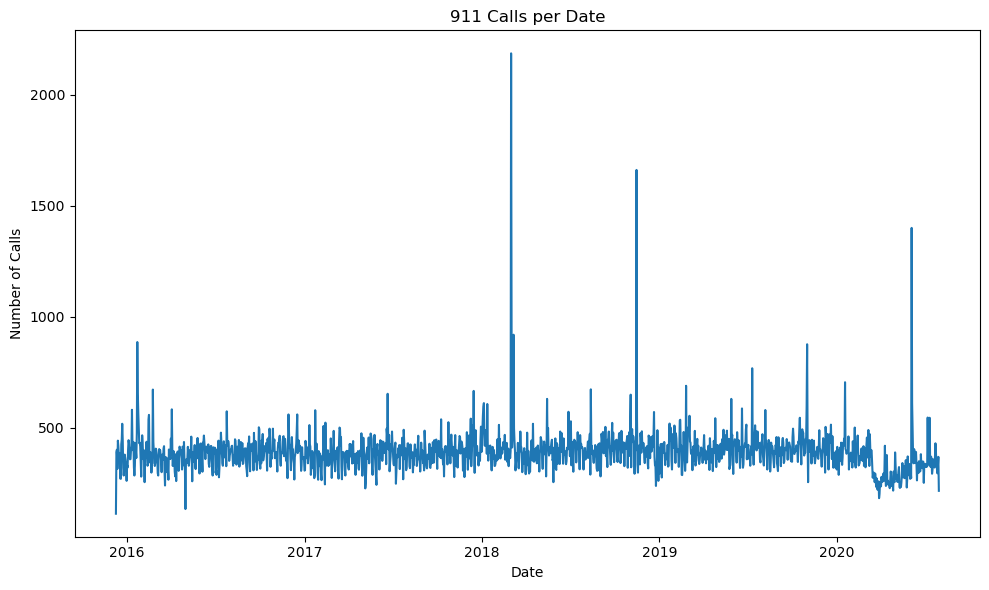

In [41]:
calls_by_date = df.groupby('Date').count()

plt.figure(figsize=(10, 6))
calls_by_date['twp'].plot()
plt.title('911 Calls per Date')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

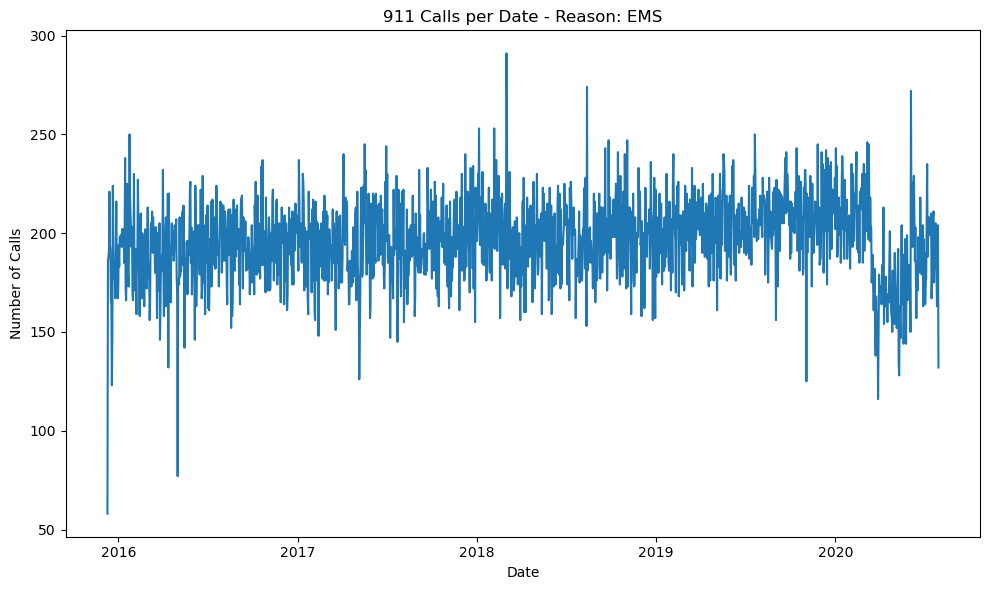

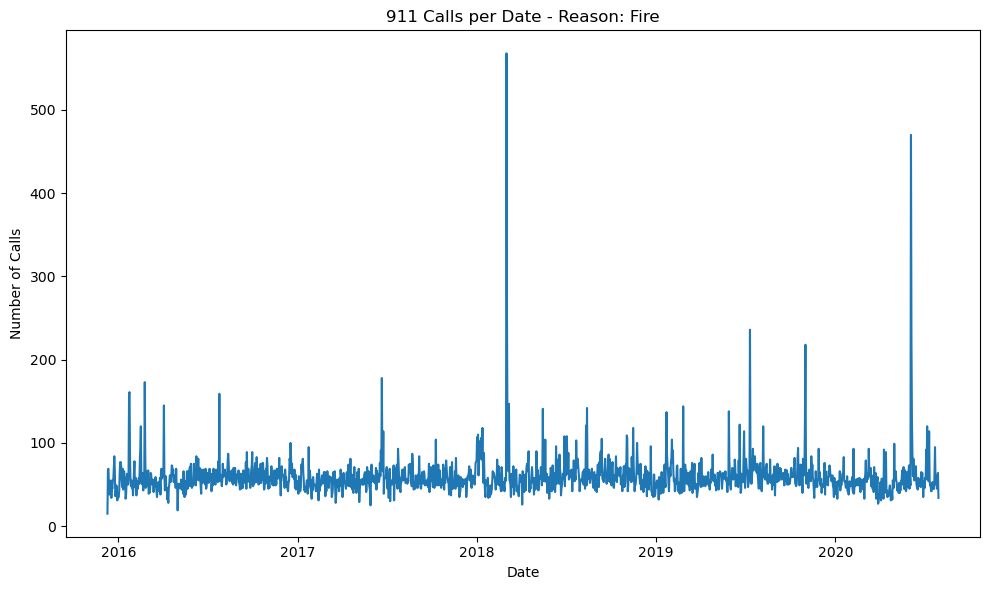

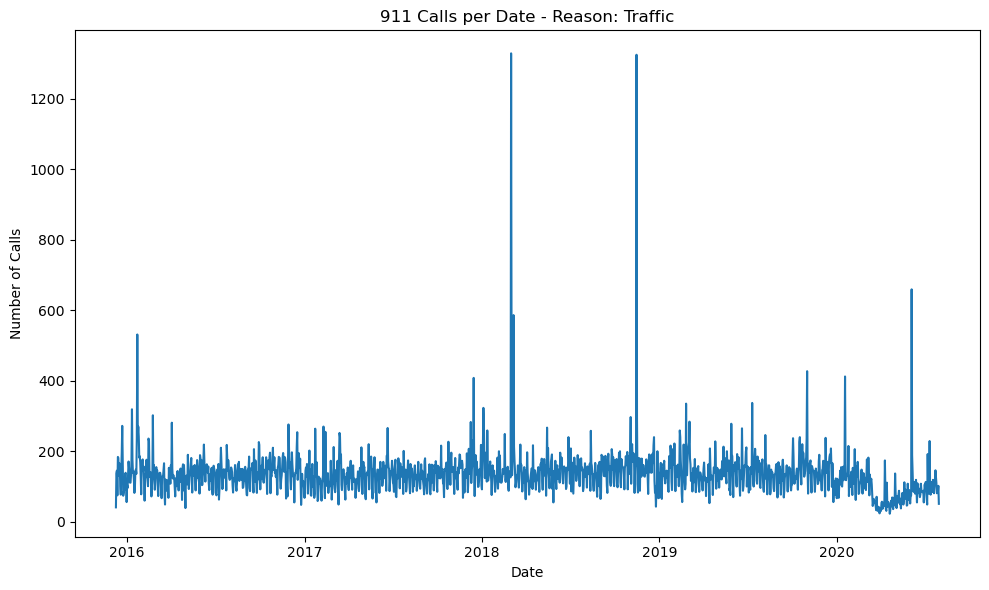

In [42]:
for reason in df['Reason'].unique():
    df_reason = df[df['Reason'] == reason]
    calls_by_date_reason = df_reason.groupby('Date').count()
    
    plt.figure(figsize=(10, 6))
    calls_by_date_reason['twp'].plot()
    plt.title(f'911 Calls per Date - Reason: {reason}')
    plt.xlabel('Date')
    plt.ylabel('Number of Calls')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='date'>

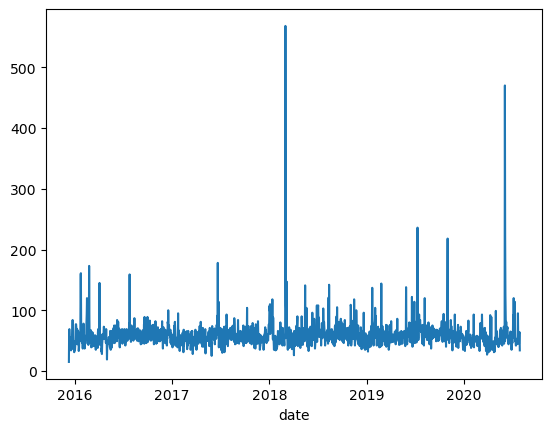

<Axes: xlabel='date'>

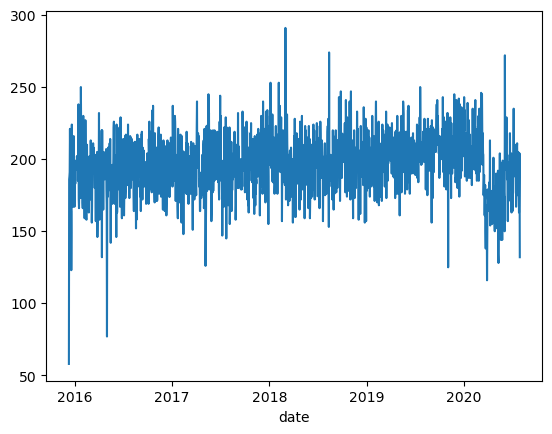

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [43]:
day_hour = df.groupby(['Day of Week', 'Hour']).count()['twp'].unstack()

print(day_hour.head())

Hour           0     1     2     3     4     5     6     7     8     9   ...  \
Day of Week                                                              ...   
0            1893  1567  1366  1271  1336  1843  2675  4428  5502  5722  ...   
1            1719  1455  1322  1212  1245  1741  2782  4425  5633  5562  ...   
2            1662  1481  1258  1262  1128  1609  2667  4643  5465  5443  ...   
3            1731  1407  1424  1234  1292  1774  2814  4431  5296  5411  ...   
4            1981  1632  1449  1296  1338  1638  2663  4138  5017  5288  ...   

Hour           14    15    16    17    18    19    20    21    22    23  
Day of Week                                                              
0            5713  6289  6341  6407  5440  4488  3823  3252  2654  2069  
1            5923  6251  6494  6877  5625  4618  3843  3408  2706  2133  
2            6068  6532  6743  7061  5690  4684  4113  3530  2825  2204  
3            6078  6493  6374  6933  5510  4701  4043  3490  2844  23

**Now create a HeatMap using this new DataFrame.**

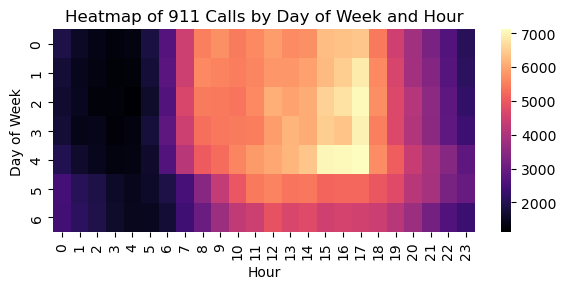

In [44]:
plt.figure(figsize=(6, 3))
sns.heatmap(day_hour, cmap='magma')
plt.title('Heatmap of 911 Calls by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

**Now create a clustermap using this DataFrame.**

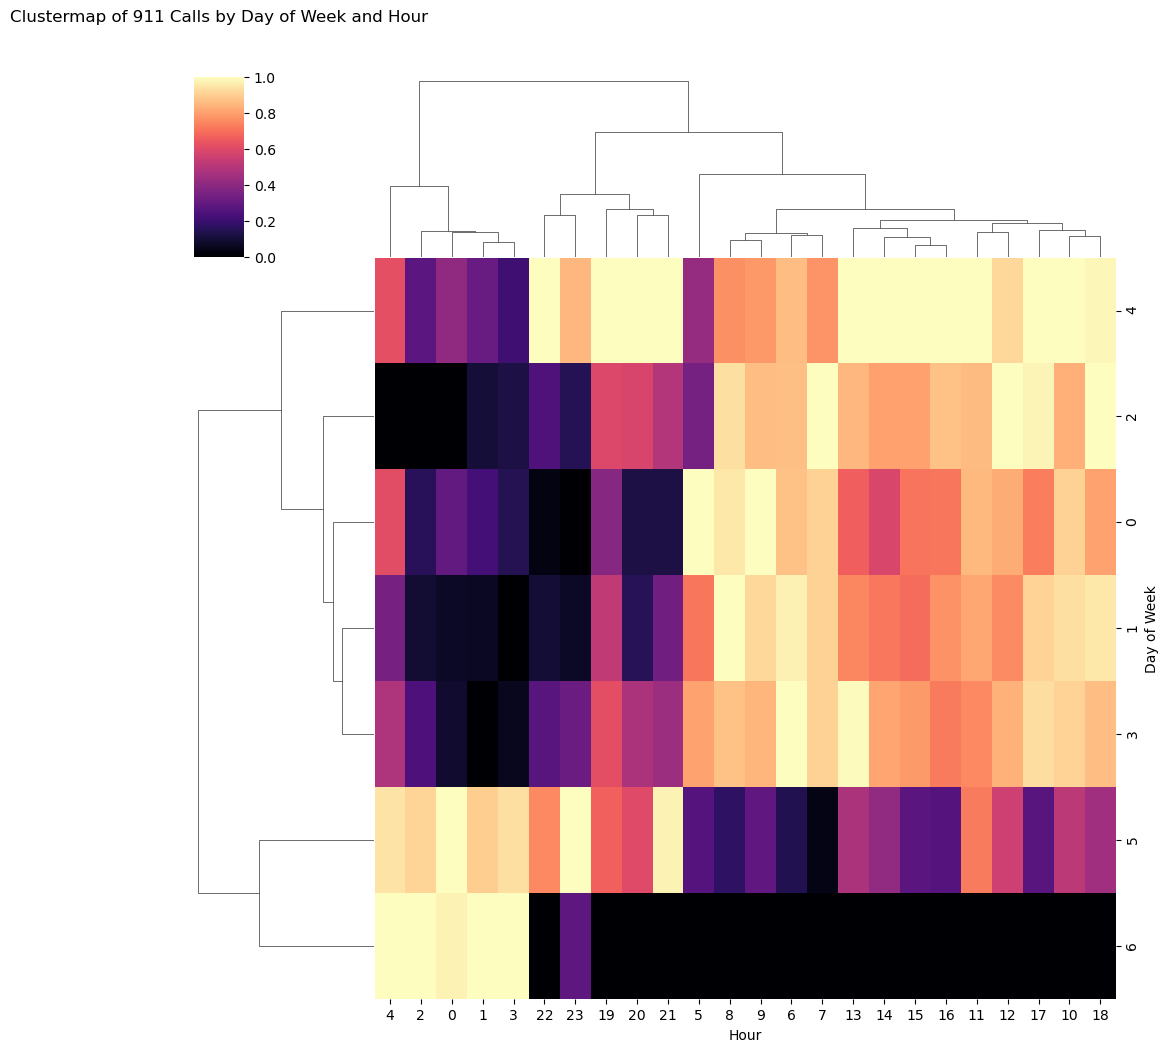

In [45]:
sns.clustermap(day_hour, cmap='magma', standard_scale=1)
plt.title('Clustermap of 911 Calls by Day of Week and Hour', pad=40)  
plt.show()

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [47]:
# Convert timeStamp to datetime (if not done yet)
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Extract Month (1 = Jan, 12 = Dec)
df['Month'] = df['timeStamp'].dt.month



In [48]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
             5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['MonthName'] = df['Month'].map(month_map)


<Figure size 1000x600 with 0 Axes>

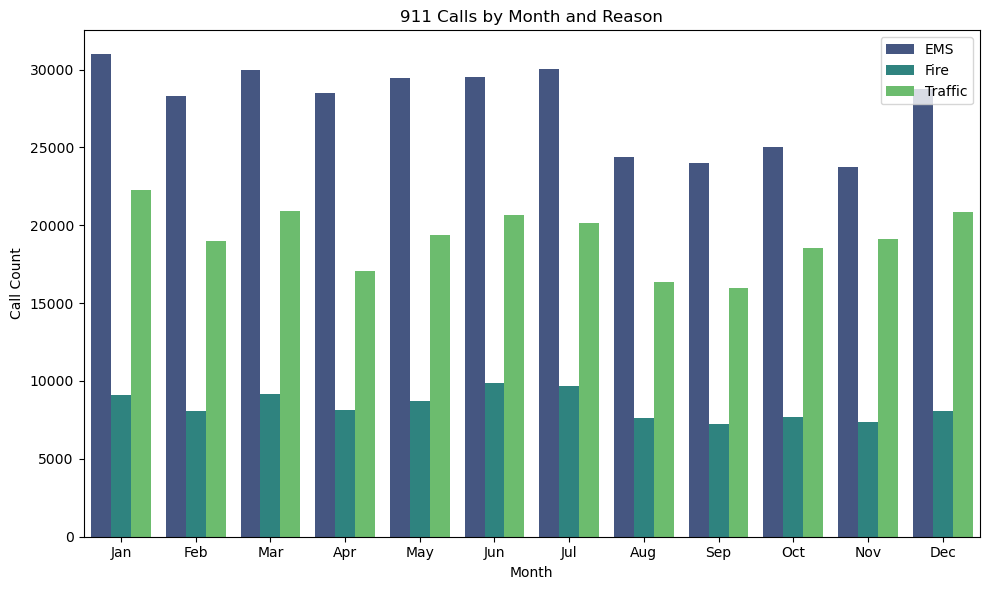

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MonthName', hue='Reason', palette='viridis',
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('911 Calls by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Call Count')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 800x400 with 0 Axes>

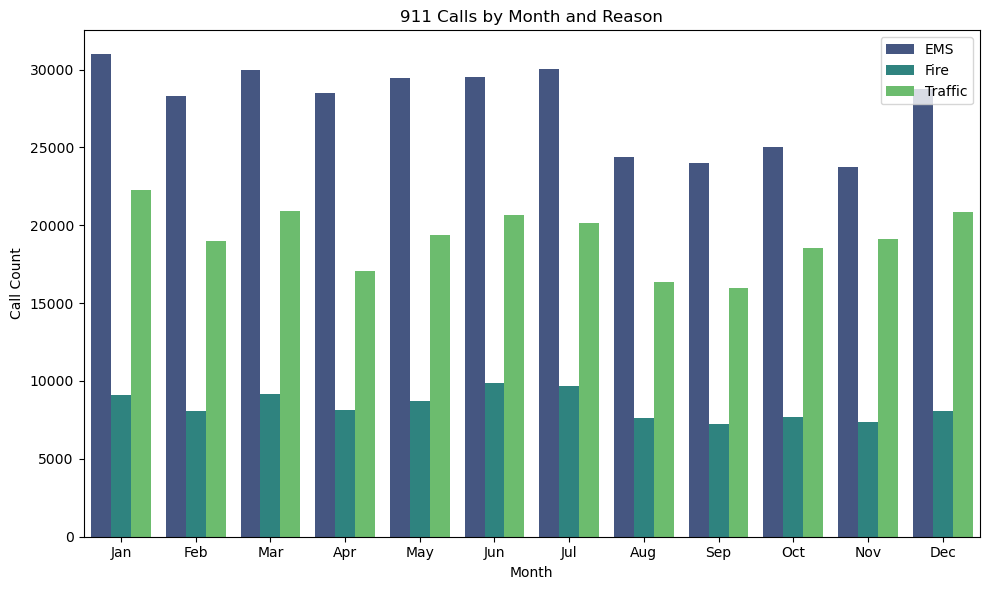

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MonthName', hue='Reason', palette='viridis',
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('911 Calls by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Call Count')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


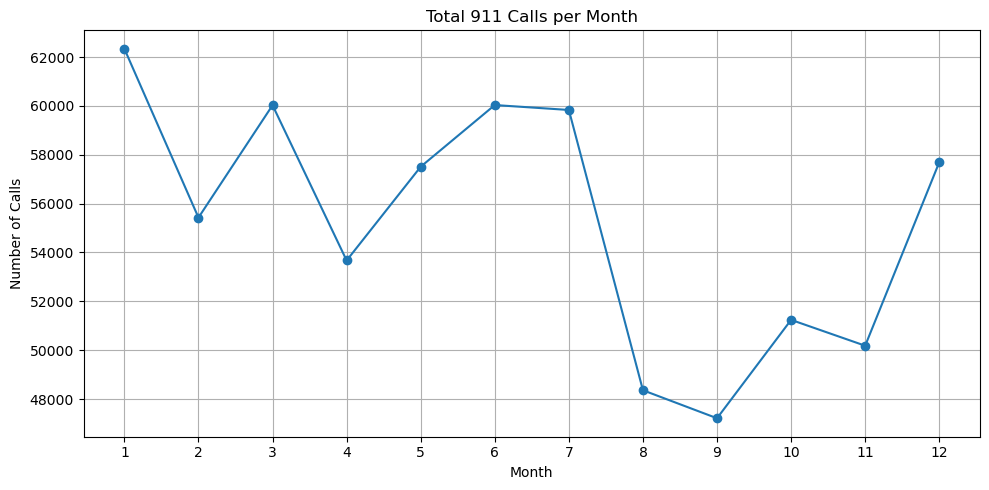

In [52]:
# Group by month and count
monthly_calls = df.groupby('Month').count()

plt.figure(figsize=(10, 5))
monthly_calls['title'].plot(kind='line', marker='o')
plt.title('Total 911 Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.xticks(range(1, 13))  # months 1 to 12
plt.tight_layout()
plt.show()


**Continue exploring the Data however you see fit!**
# Great Job!